# Drug Consumptions (UCI)

## Problem formulation

The goal of the project is to determine whether certain personality characteristics influence the likelihood of drug use. The purpose of the model is to predict substance use based on psychological traits. It can be beneficial in identifying groups of individuals who are at risk of substance abuse, and therefore can support the planning health policies and designing prevention strategies.

The Drug Conspumption (UCI) data set contains records for 1885 respondents. These include their age, gender, level of education, country of residence, ethnicity, personality measurements and various substance use. Detailed description of the set and process of data quantification are presented in E. Fehrman, A. K. Muhammad, E. M. Mirkes, V. Egan and A. N. Gorban, "The Five Factor Model of personality and evaluation of drug consumption risk" [1].

In [1]:
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from IPython.display import display

df = pd.read_csv("Drug_Consumption.csv")

df.drop(columns=["ID"], inplace=True)

display(df)

df_before_preprocessing = df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1882,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


**Column overview:**


Categorical data:

1. `ID` — the number of the record
2. `Age` — the age group of the respondent
3. `Gender` — the gender of the respondent; Male or Female
4. `Education` — the level of education of the participant
4. `Country` — the country of origin of the participant
5. `Ethnicity` — the ethnicity of the participant


Personality measurements (numeric values):

6. `Nscore` — NEO-FFI-R Neuroticism
7. `Escore` — NEO-FFI-R Extraversion
8. `Oscore` — NEO-FFI-R Openness to experience
9. `Ascore` — NEO-FFI-R Agreeableness
10. `Cscore` — NEO-FFI-R Conscientiousness
11. `Impulsive` — impulsiveness measured by BIS-11
12. `SS` — sensation seeing measured by ImpSS


Substance usage:

13. `Alcohol` — alcohol consumption
14. `Amphet` — amphetamines consumption
15. `Amyl` — nitrite consumption
16. `Benzos` — benzodiazepine consumption
17. `Caff` — caffeine consumption
18. `Cannabis` — marijuana consumption
19. `Choc` — chocolate consumption
20. `Coke` — cocaine consumption
21. `Crack` — crack cocaine consumption
22. `Ecstasy` — ecstasy consumption
23. `Heroin` — heroin consumption
24. `Ketamine` — ketamine consumption
25. `Legalh` — legal highs consumption
26. `LSD` — LSD consumption
27. `Meth` — methadone consumption
28. `Mushroom` — magic mushroom consumption
29. `Nicotine` — nicotine consumption
30. `Semer` — class of fictitious drug Semeron consumption (i.e. control)
31. `VSA` — class of volatile substance abuse consumption


The records for columns 13-31 (substance usage) contain rating's:

* CL0 - never used
* CL1 - used over a decade ago
* CL2 - used in last decade
* CL3 - used in last year
* CL4 - used in last month
* CL5 - used in last week
* CL6 - used in last day

## DAG

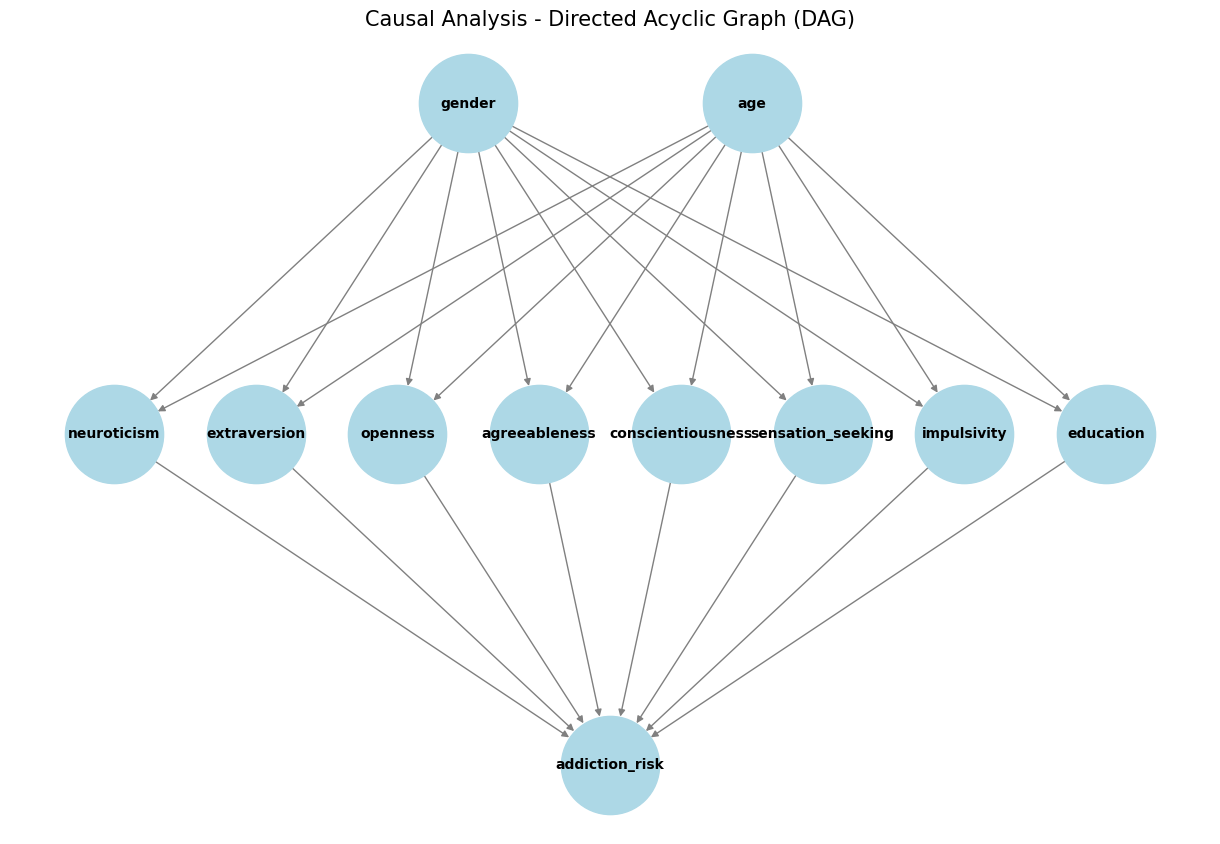

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

edges = [
    ('gender', 'neuroticism'),
    ('gender', 'extraversion'),
    ('gender', 'openness'),
    ('gender', 'agreeableness'),
    ('gender', 'conscientiousness'),
    ('gender', 'education'),
    ('gender', 'sensation_seeking'),
    ('gender', 'impulsivity'),

    ('age', 'neuroticism'),
    ('age', 'extraversion'),
    ('age', 'openness'),
    ('age', 'agreeableness'),
    ('age', 'conscientiousness'),
    ('age', 'education'),
    ('age', 'sensation_seeking'),
    ('age', 'impulsivity'),

    ('education', 'addiction_risk'),
    ('neuroticism', 'addiction_risk'),
    ('extraversion', 'addiction_risk'),
    ('openness', 'addiction_risk'),
    ('agreeableness', 'addiction_risk'),
    ('conscientiousness', 'addiction_risk'),
    ('sensation_seeking', 'addiction_risk'),
    ('impulsivity', 'addiction_risk')
]

G.add_edges_from(edges)

pos = {
    'gender': (-0.5, 5),
    'age': (1.5, 5),
    'education': (4, 4),

    'neuroticism': (-3, 4),
    'extraversion': (-2, 4),
    'openness': (-1, 4),
    'agreeableness': (0, 4),
    'conscientiousness': (1, 4),
    'sensation_seeking': (2, 4),
    'impulsivity': (3, 4),

    'addiction_risk': (0.5, 3)
}

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=5000, node_color='lightblue',
        font_size=10, font_weight='bold', arrows=True, edge_color='gray')

plt.title("Causal Analysis - Directed Acyclic Graph (DAG)", fontsize=15)
plt.axis('off')
plt.show()


## Preprocessing

### Categorical data before preprocessing

The `Age` column was converted into numerical values so that the natural order of age groups is preserved. The `Education` column was altered in a similar manner, the higher assigned numbers correspond with the higher education level. The `Gender` column was changed into a binary (0 corresponds to male, 1 to female). The `Education, Country, Ethnicity` columns were replaced with new binary columns representing each unique category. Those new columns can have either True or False value. All columns which contained information about whether the respodent left school at age 16, 17 or 18 were merged into a single column - `Left school before 18 years`. Such approach reduces data complexity, which makes it easier to interpret and visualise.

The rating's from the columns concerning drug consumption were converted into a binary format: 0 if the substance was never used or last used over a year ago, 1 if the consumption was reported within the past year). This transformation makes the data more suitable for the modeling the occurrence of drug use rather than its frequency intesity.

In [3]:
import matplotlib.pyplot as plt

def plot_categorical_distribution(df, column, ax, label_map=None, sort_numerically=False, title=None):

    values = df[column].dropna()

    counts = values.value_counts()
    percents = counts / counts.sum() * 100

    sorted_counts = counts.sort_values(ascending=False)
    sorted_percents = percents[sorted_counts.index]
    counts = sorted_counts
    percents = sorted_percents

    if label_map:
        display_labels = counts.index.map(lambda x: label_map.get(x, x))
    else:
        display_labels = counts.index

    bars = ax.barh(display_labels, counts.values, color='skyblue', edgecolor='black')

    for bar, percent in zip(bars, percents):
        ax.text(bar.get_width() + 10, bar.get_y() + bar.get_height() / 2,
                    f'{percent:.1f}%', ha='left', va='center', fontsize=9)

    ax.set_title(title or f'Distribution of {column}')
    ax.set_ylabel(column)
    ax.set_xlabel('Count')
    ax.set_xlim(0, counts.max() * 1.2)
    ax.grid(axis='x', linestyle='--', alpha=0.5)


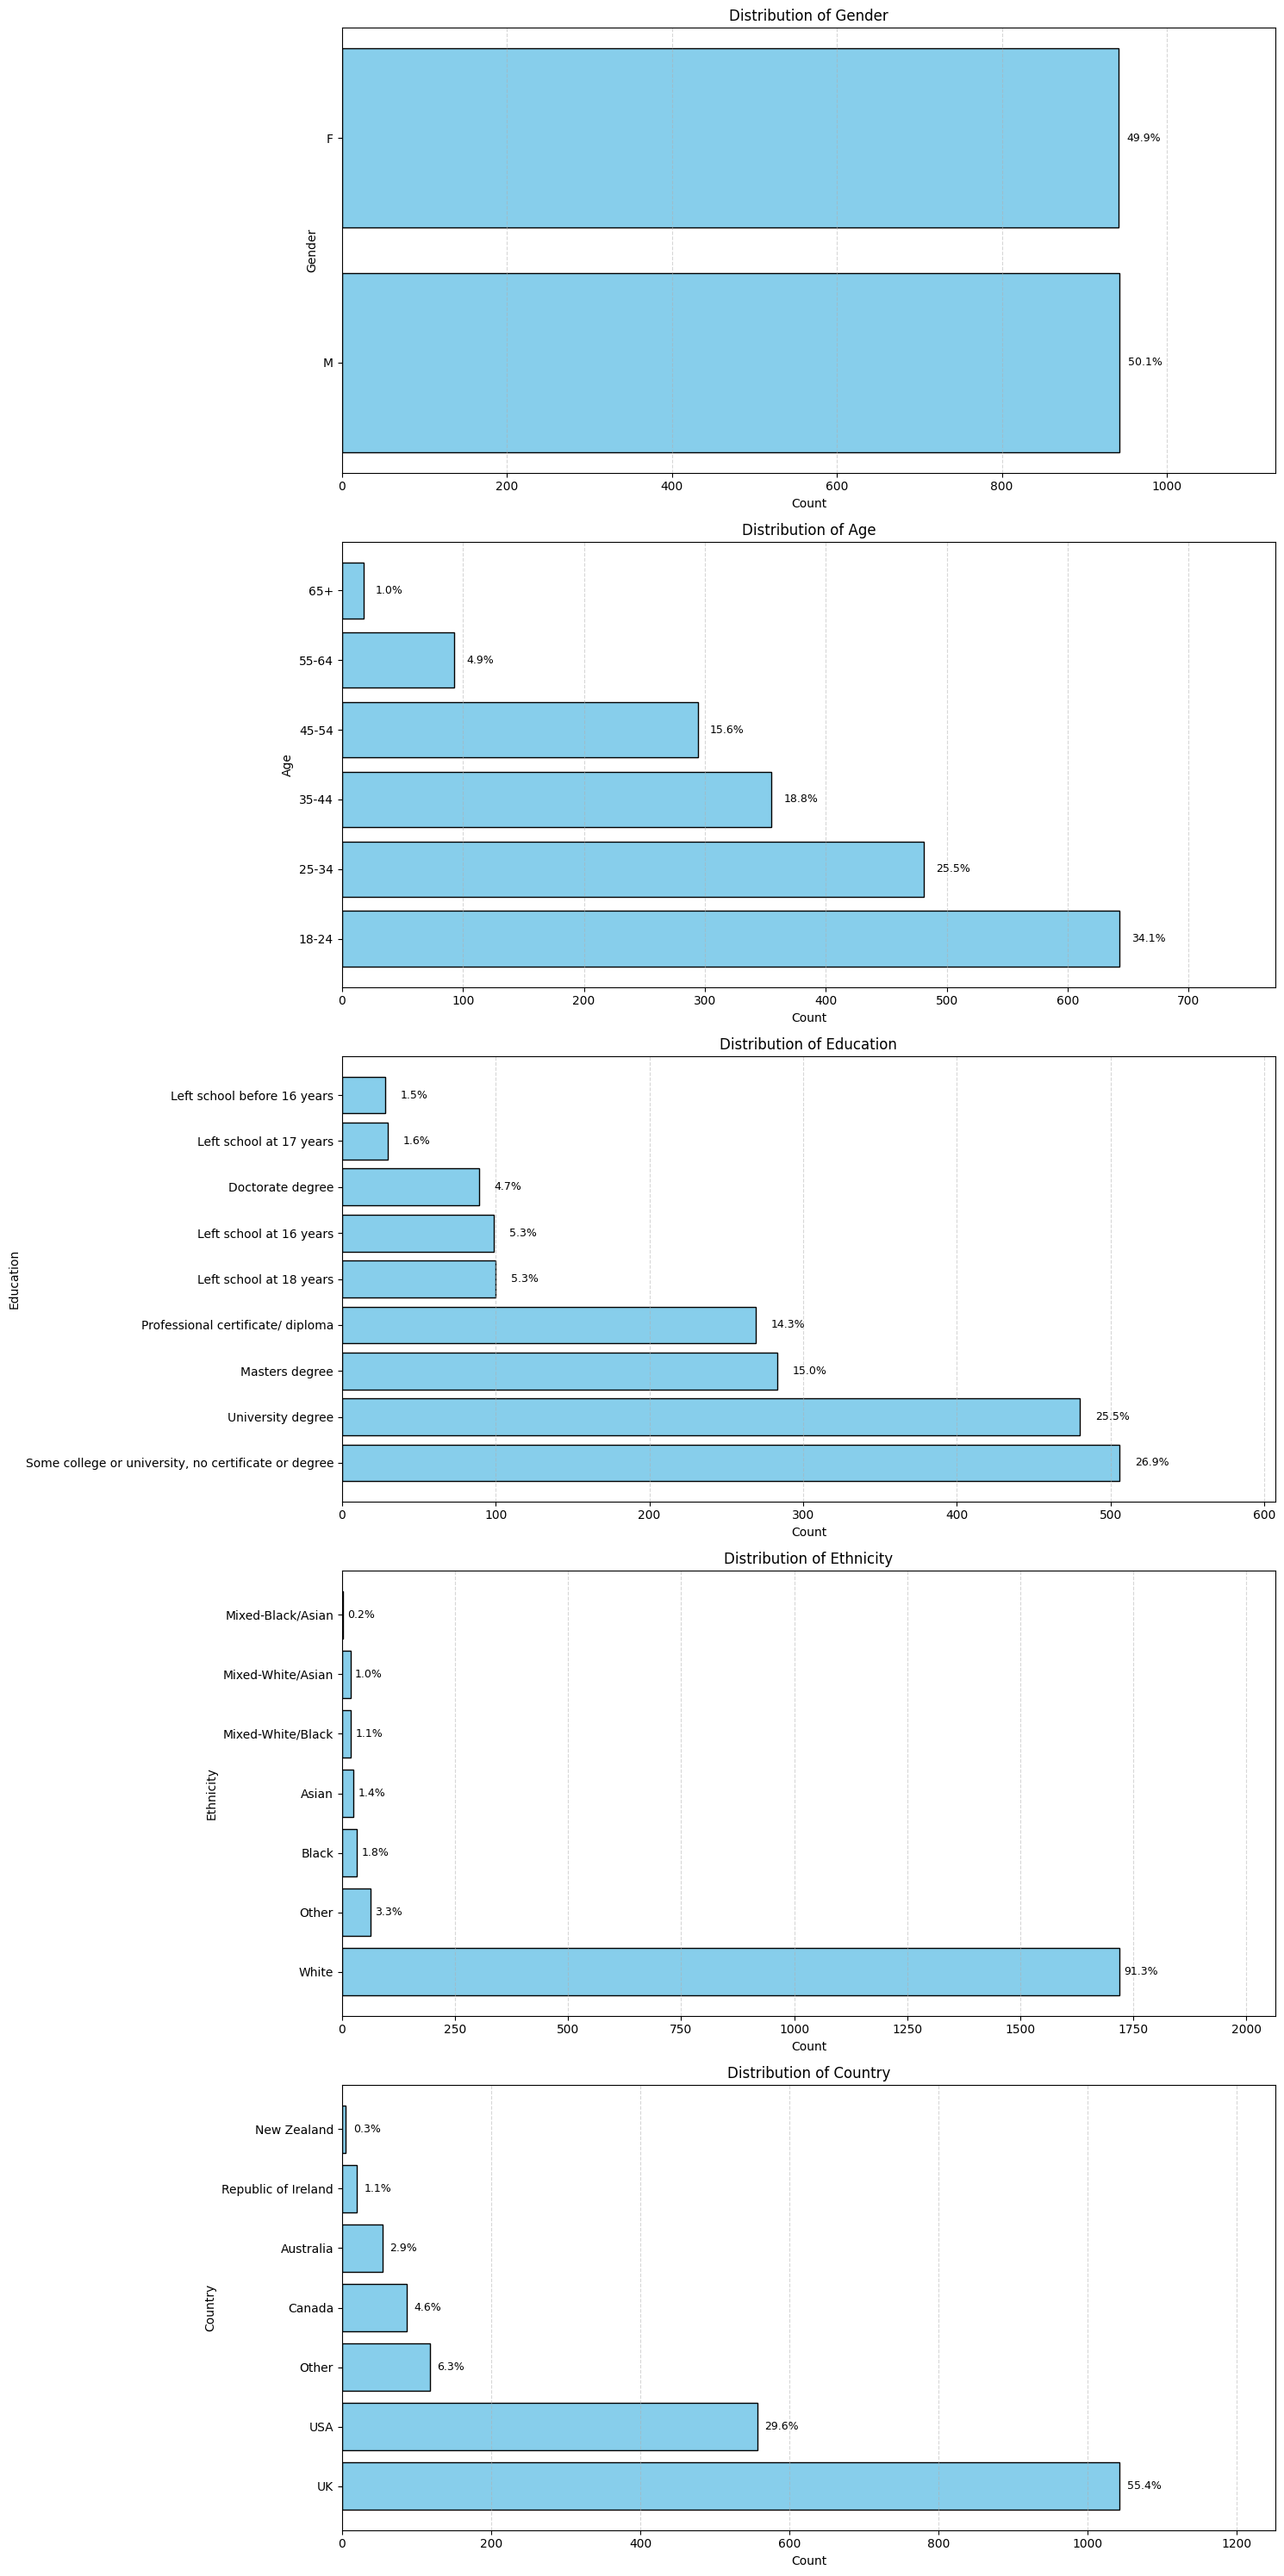

In [4]:
fig, axes = plt.subplots(5, 1, figsize=(15, 30))

columns = ['Gender', 'Age', 'Education', 'Ethnicity', 'Country']

for ax, col in zip(axes, columns):
    plot_categorical_distribution(df, col, ax=ax)

plt.tight_layout()
plt.show()


In [5]:
#df.loc[df['Education'].str.contains('left school', case=False), 'Education'] = 'left school before 18 years'
#df.loc[df['Education'].str.contains('Masters degree', case=False), 'Education'] = 'University degree'

age_mapping = {
    '18-24' : 0,
    '25-34' : 1,
    '35-44' : 2,
    '45-54' : 3,
    '55-64' : 4,
    '65+' : 5
}

gender_mapping = {
    'M' : 0,
    'F' : 1
}

education_map = {
    'Left school before 16 years': 0,
    'Left school at 16 years': 0,
    'Left school at 17 years': 0,
    'Left school at 18 years': 0,
    'Some college or university, no certificate or degree': 1,
    'Professional certificate/ diploma': 2,
    'University degree': 3,
    'Masters degree': 4,
    'Doctorate degree': 5
}

df['Age'] = df['Age'].map(age_mapping)
df['Gender'] = df['Gender'].map(gender_mapping)
df['Education'] = df['Education'].map(education_map)

df = pd.get_dummies(df, columns=['Ethnicity', 'Country'], drop_first=True)

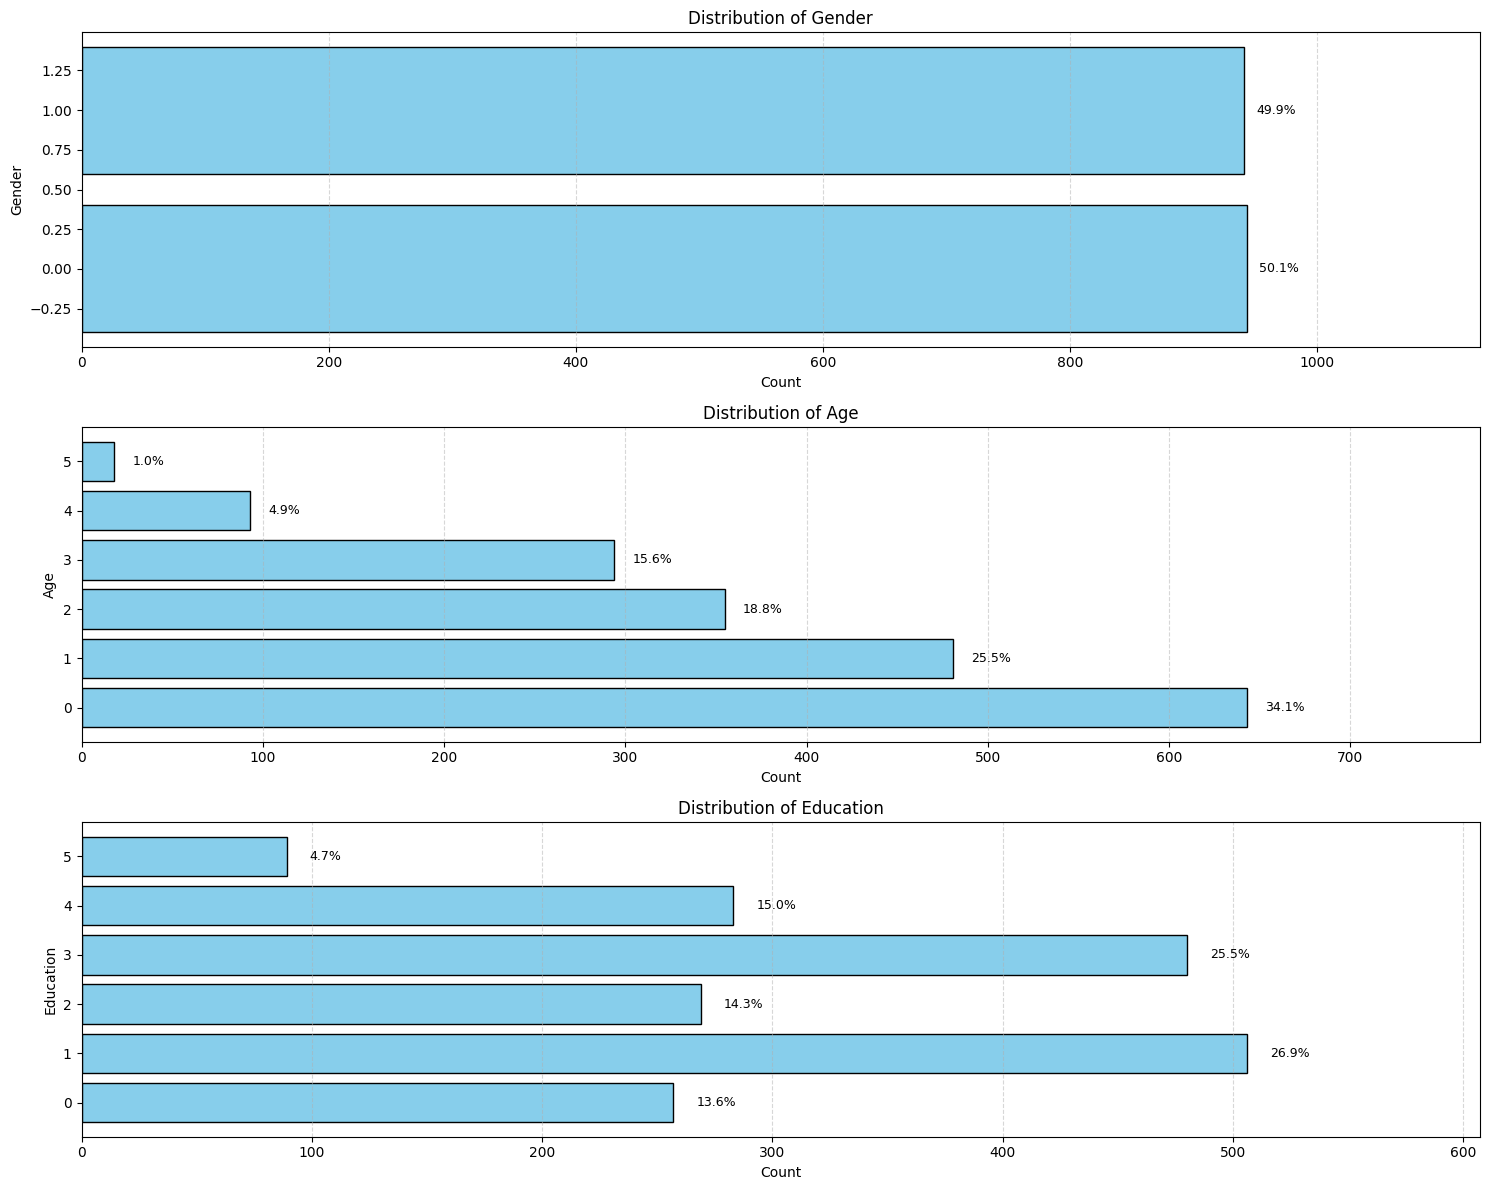

In [6]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

columns = ['Gender', 'Age', 'Education']

for ax, col in zip(axes, columns):
    plot_categorical_distribution(df, col, ax=ax)

plt.tight_layout()
plt.show()

In [7]:
filtered_cols_country = [col for col in df.columns if col.startswith('Country')]
display(df[filtered_cols_country])

#filtered_cols_education = [col for col in df.columns if col.startswith('Education')]
#display(df[filtered_cols_education])

filtered_cols_ethnicity = [col for col in df.columns if col.startswith('Ethnicity')]
display(df[filtered_cols_ethnicity])

,Country_Canada,Country_New Zealand,Country_Other,Country_Republic of Ireland,Country_UK,Country_USA
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,True,False,False,False,False,False
...,...,...,...,...,...,...
1879,False,False,False,False,False,True
1880,False,False,False,False,False,True
1881,False,False,False,False,False,True
1882,False,False,False,False,False,True


,Ethnicity_Black,Ethnicity_Mixed-Black/Asian,Ethnicity_Mixed-White/Asian,Ethnicity_Mixed-White/Black,Ethnicity_Other,Ethnicity_White
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
1879,False,False,False,False,False,True
1880,False,False,False,False,False,True
1881,False,False,False,False,False,True
1882,False,False,False,False,False,True


### Drugs columns - preprocessing

In [8]:
usage_mapping = {
    'CL0': 0,  # Never used
    'CL1': 1,  # Used over a decade ago
    'CL2': 2,  # Used in last decade
    'CL3': 3,  # Used in last year
    'CL4': 4,  # Used in last month
    'CL5': 5,  # Used in last week
    'CL6': 6   # Used in last day
}

substance_cols = [
    'Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke',
    'Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth',
    'Mushrooms','Nicotine','Semer','VSA'
]

for col in substance_cols:
    df[col] = df[col].map(usage_mapping)

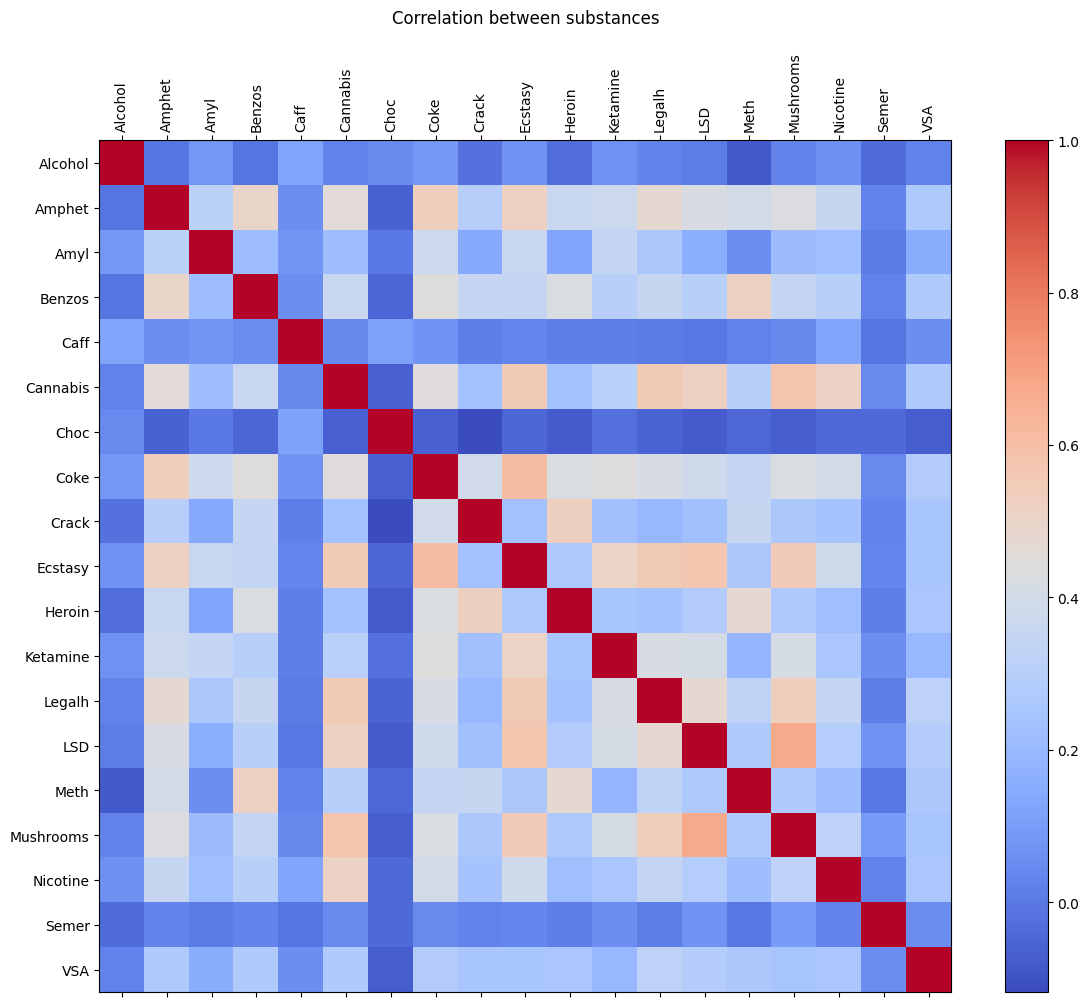

/tmp/ipykernel_154/56276257.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary = df[substance_cols].applymap(lambda x: 0 if x == 0 else 1)


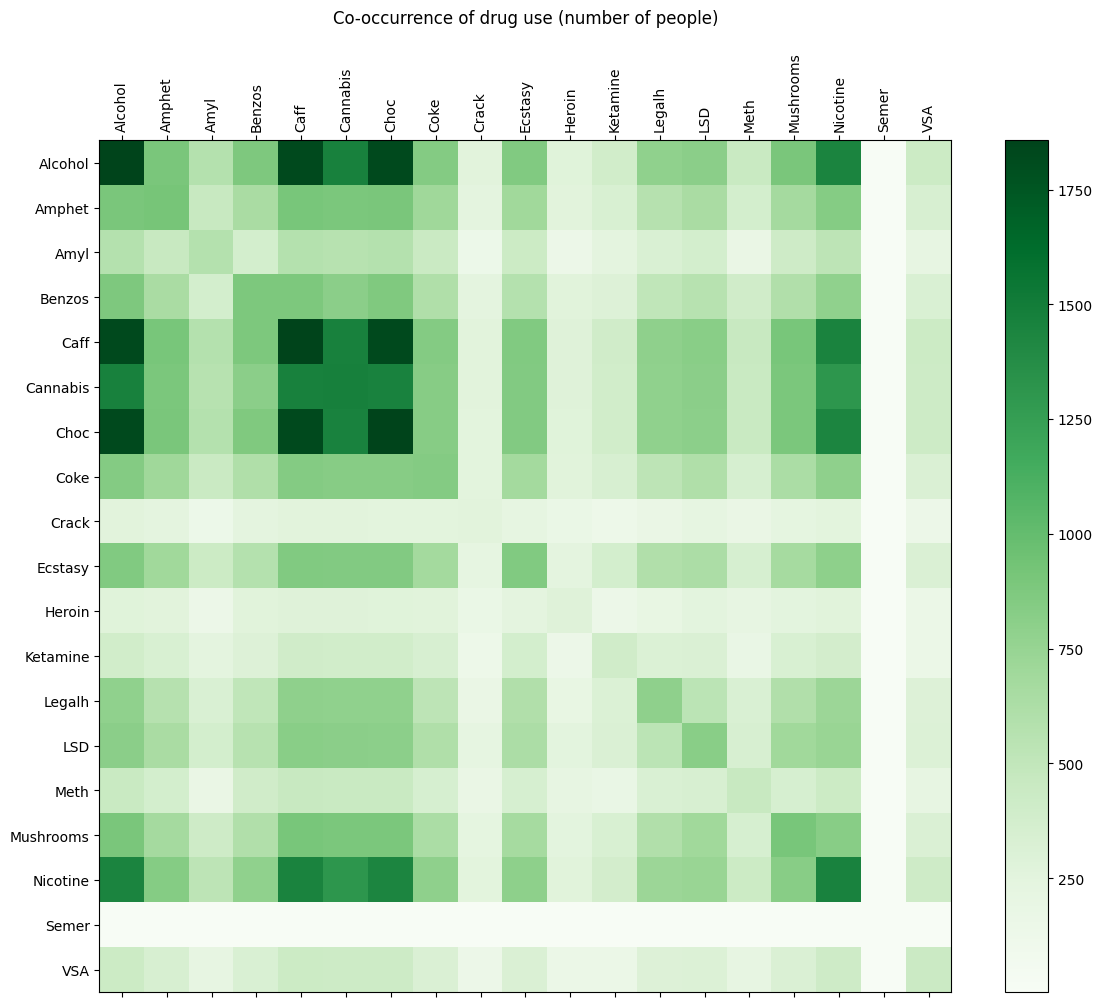

In [9]:
corr = df[substance_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(corr, cmap='coolwarm')
plt.xticks(range(len(substance_cols)), substance_cols, rotation=90)
plt.yticks(range(len(substance_cols)), substance_cols)
fig.colorbar(cax)
plt.title("Correlation between substances", pad=20)
plt.tight_layout()
plt.show()

df_binary = df[substance_cols].applymap(lambda x: 0 if x == 0 else 1)

# Co-occurrence matrix
co_occur = df_binary.T.dot(df_binary)

# Visualisation
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(co_occur, cmap='Greens')
plt.xticks(range(len(substance_cols)), substance_cols, rotation=90)
plt.yticks(range(len(substance_cols)), substance_cols)
fig.colorbar(cax)
plt.title("Co-occurrence of drug use (number of people)", pad=20)
plt.tight_layout()
plt.show()

In [10]:
# Binary format

usage_mapping = {
    0 : 0,  # Never used
    1: 0,  # Used over a decade ago
    2: 0,  # Used in last decade
    3: 1,  # Used in last year
    4: 1,  # Used in last month
    5: 1,  # Used in last week
    6: 1   # Used in last day
}

substance_cols = [
    'Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke',
    'Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth',
    'Mushrooms','Nicotine','Semer','VSA'
]

for col in substance_cols:
    df[col] = df[col].map(usage_mapping)

display(df[substance_cols])

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0,0,0,1,1,1,1,0,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,1
1880,1,0,0,0,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0
1881,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0
1882,1,0,0,0,1,1,1,0,0,1,0,0,1,1,0,1,1,0,0


We can select a group of drugs known as highly addictive.

In [11]:
highly_addictive_drugs = [
    'Amphet', 'Coke', 'Crack', 'Heroin', 'Meth'
]

df['HA_Drugs_Use'] = df[highly_addictive_drugs].apply(lambda row: 1 if row.any() else 0, axis=1)

print("Highly addictive drugs - number of people: ", df['HA_Drugs_Use'].sum())

Highly addictive drugs - number of people:  704


### Personality - preprocessing

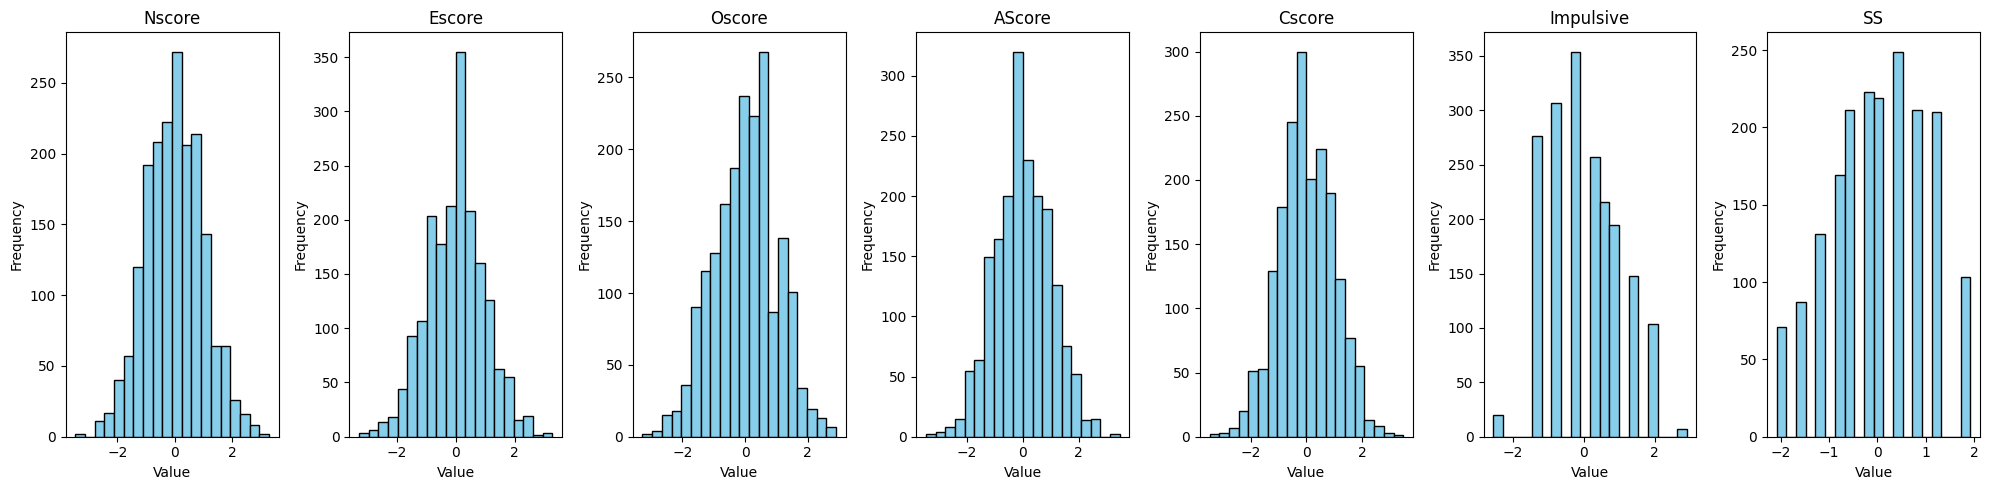

In [12]:
columns = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']

fig, axes = plt.subplots(1, 7, figsize=(20, 5))

for i, column in enumerate(columns):
    axes[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Stan configuration

In [13]:
import cmdstanpy
import arviz as az
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cmdstanpy import CmdStanModel

# Model 1

The first model simulates binary outcomes representing the risk of drug use (e.g., addiction) based on personality-related features, using logistic regression. The model incorporates seven predictors:
Nscore (Neuroticism)
Escore (Extraversion)
Oscore (Openness to experience)
AScore (Agreeableness)
Cscore (Conscientiousness)
Impulsive (Impulsivity)
SS (Sensation Seeking)
with coefficients beta[i] for each of 7 predictors.

Both the intercept (alpha) and the seven regression coefficients (beta) are sampled from normal distributions to capture the uncertainty regarding each trait’s influence on drug use. For the first five traits — derived from general personality dimensions measured by standard surveys (e.g., the Big Five) — a prior mean of 0 was used, reflecting a neutral stance with no assumed directional effect. In contrast, the coefficients for Impulsiveness and Sensation Seeking were assigned a prior mean of 0.5. This choice reflects existing evidence suggesting that the ImpSS scale is a validated and reliable indicator of behavioral tendencies associated with increased risk, such as drinking or smoking [2]. The intercept (alpha) with the mean of -2.197 corresponds to a low baseline probability of drug use in the absence of risk factors (~10% of population affected).

#### Data
N:
The number of observations (e.g., 1000 individuals).

X:
An N x 7 matrix of real-valued predictors. Each row corresponds to a person, and each column corresponds to one of the seven standardized personality traits (in the same order as listed above).

y: 
Binary observed outcomes (drug user: 1, non-user: 0)

#### Formulas
##### dot_product(X[n], beta)
Computes the linear predictor for observation n, i.e., the weighted sum of the personality traits for that individual
##### p[n] = inv_logit(alpha + dot_product(X[n], beta))
Applies the logistic (sigmoid) function to the linear predictor. Converts the log-odds into a probability p[n] between 0 and 1. This is interpreted as the probability of drug use (addiction risk) for the n-th individual, based on their traits.
##### y_sim[n] (OR y_pred[n]) = bernoulli_rng(p[n])
Samples the binary outcome from a Bernoulli distribution with probability p[n]. This simulates whether the n-th individual is a drug user (1) or not (0), according to the modeled risk.
##### y ~ bernoulli_logit(alpha + X * beta)
Models the binary outcome using logistic regression, as explained above.

### Prior predictive check

In [14]:
stanfile = 'stan_models/model_1_LR_ppc.stan'
model = CmdStanModel(stan_file=stanfile, compile=True)
print(model.code())

13:11:38 - cmdstanpy - WARNING - CmdStanModel(compile=...) is deprecated and will be removed in the next major version. The constructor will always ensure a model has a compiled executable.
If you wish to force recompilation, use force_compile=True instead.


data {
  int<lower=0> N;
  matrix[N, 7] X;
}

generated quantities {
  real alpha;
  vector[7] beta;
  vector[N] y_sim;
  vector[N] p;

  alpha = normal_rng(-2.197, 0.5);

  for (i in 1:5)
    beta[i] = normal_rng(0, 0.3);
  for (i in 6:7)
    beta[i] = normal_rng(0.5, 0.3);

  for (n in 1:N) {
    p[n] = inv_logit(alpha + dot_product(X[n], beta));
    y_sim[n] = bernoulli_rng(p[n]);
  }
}


In [15]:
R = 1000
psych_cols = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']
X = np.random.normal(loc=0.0, scale=1.0, size=(1000, 7))
data = {'N' : 1000, 'X' : X}
sim=model.sample(data=data,
                 iter_sampling=R,
                     chains=1,
                     fixed_param=True,
                     refresh=R)


13:11:38 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

13:11:39 - cmdstanpy - INFO - CmdStan done processing.


In [16]:
y = sim.stan_variable("y_sim")
p = sim.stan_variable("p")

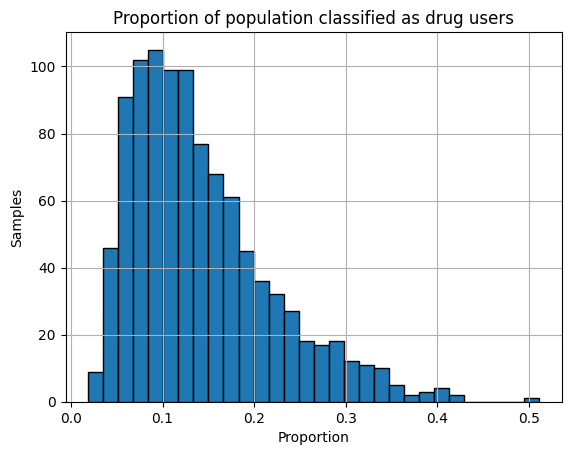

In [17]:
probs_per_population = p.mean(axis=0)
plt.hist(probs_per_population, bins=30, edgecolor='k')
plt.xlabel("Proportion")
plt.ylabel("Samples")
plt.title("Proportion of population classified as drug users")
plt.grid(True)
plt.show()

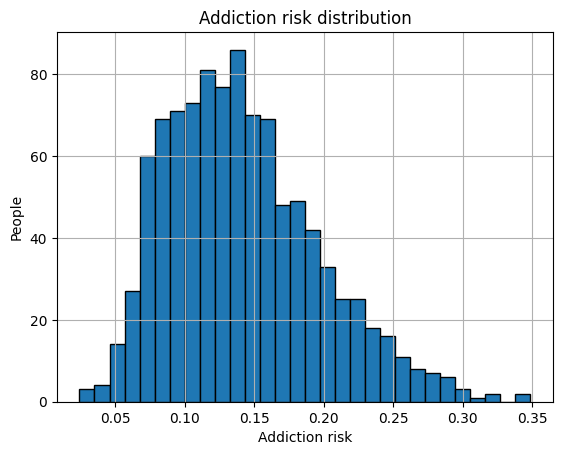

In [18]:
probs_per_person = p.mean(axis=1)
plt.hist(probs_per_person, bins=30, edgecolor='k')
plt.xlabel("Addiction risk")
plt.ylabel("People")
plt.title("Addiction risk distribution")
plt.grid(True)
plt.show()

### Model fit and posterior predictive check

In [19]:
model_fit=CmdStanModel(stan_file='stan_models/model_1_LR_fit.stan')
print(model_fit.code())

data {
  int<lower=0> N;
  array[N] int <lower=0, upper=1> y;
  matrix[N, 7] X;
}

parameters {
  real alpha;
  vector[7] beta;
}

model {
  alpha ~ normal(-2.197, 0.5);
  beta[1:5] ~ normal(0, 0.3);
  beta[6:7] ~ normal(0.5, 0.3);

  y ~ bernoulli_logit(alpha + X * beta);
}

generated quantities {
  vector[N] y_pred;
  vector[N] p;
  for (n in 1:N) {
    p[n] = inv_logit(alpha + dot_product(X[n], beta));
    y_pred[n] = bernoulli_rng(p[n]);  
  }
}


In [20]:
psych_cols = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']
data = {'N' : 1884, 'X' : df[psych_cols].values.tolist(), 'y': df['HA_Drugs_Use']}
fit=model_fit.sample(data=data,
                 iter_sampling=1000,
                     chains=1)
samples = fit.draws_pd()
alpha_samples = samples["alpha"]

13:11:40 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

13:11:43 - cmdstanpy - INFO - CmdStan done processing.


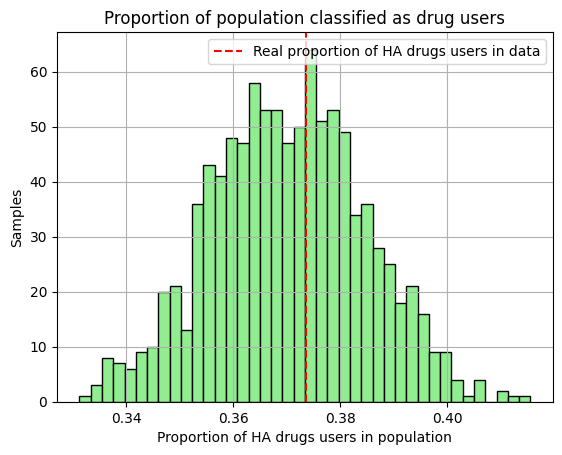

In [21]:
y_pred_cols = [col for col in samples.columns if col.startswith('y_pred')]
y_pred_matrix = samples[y_pred_cols].values
predicted_proportions = y_pred_matrix.mean(axis=1)

plt.hist(predicted_proportions, bins=40, color='lightgreen', edgecolor='black')
plt.axvline(df["HA_Drugs_Use"].mean(), color='red', linestyle='--', label='Real proportion of HA drugs users in data')
plt.xlabel('Proportion of HA drugs users in population')
plt.ylabel('Samples')
plt.title('Proportion of population classified as drug users')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_154/4762292.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


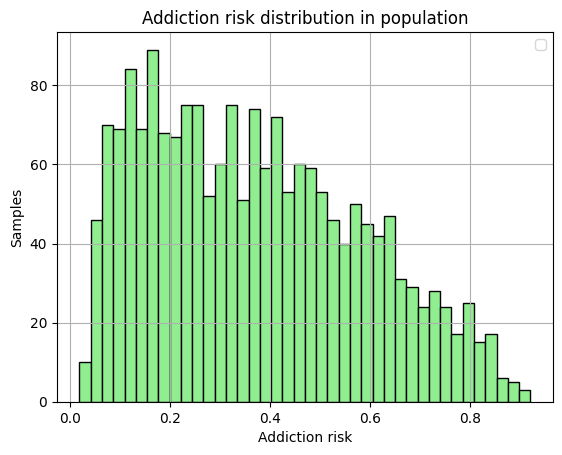

In [22]:
y_pred_cols = [col for col in samples.columns if col.startswith('y_pred')]
y_pred_matrix = samples[y_pred_cols].values
probs_per_person = y_pred_matrix.mean(axis=0)

plt.hist(probs_per_person, bins=40, color='lightgreen', edgecolor='black')
plt.xlabel("Addiction risk")
plt.ylabel("Samples")
plt.title("Addiction risk distribution in population")
plt.legend()
plt.grid(True)
plt.show()

In [47]:
def generate_profile(person_id):
    print("Person {} - % of samples indicating on addiction risk".format(person_id), y_pred_matrix[:,person_id].mean())
    df_concat = pd.concat([df_before_preprocessing, df["HA_Drugs_Use"]], axis=1)
    sample_data = df_concat[['Age', 'Gender', 'Education', 'Country', 'Ethnicity','Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'Amphet', 'Coke', 'Crack', 'Heroin', 'Meth', 'HA_Drugs_Use']].iloc[[person_id]]
    display(sample_data.style.set_table_attributes("style='display:inline'").set_caption("Person {} profile".format(person_id)))
    
y_pred_matrix = samples[y_pred_cols].values
print("Sample:", y_pred_matrix[0].mean())
print("Real proportion of HA users in data:", df["HA_Drugs_Use"].mean())
print("------------------------------------------------------------")

generate_profile(person_id=600)
generate_profile(person_id=0)
generate_profile(person_id=700)


Sample: 0.36942675159235666
Real proportion of HA users in data: 0.37367303609341823
------------------------------------------------------------
Person 600 - % of samples indicating on addiction risk 0.816


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Amphet,Coke,Crack,Heroin,Meth,HA_Drugs_Use
600,0,0,1,USA,White,1.984370,-0.947790,0.723300,-0.606330,-1.014500,0.529750,0.765400,CL3,CL0,CL0,CL0,CL3,1


Person 0 - % of samples indicating on addiction risk 0.297


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Amphet,Coke,Crack,Heroin,Meth,HA_Drugs_Use
0,1,0,5,UK,White,-0.678250,1.938860,1.435330,0.760960,-0.142770,-0.711260,-0.215750,CL2,CL3,CL0,CL0,CL3,1


Person 700 - % of samples indicating on addiction risk 0.139


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Amphet,Coke,Crack,Heroin,Meth,HA_Drugs_Use
700,4,0,3,UK,White,-1.439070,0.805230,-0.177790,-0.916990,-0.142770,-0.711260,0.079870,CL0,CL0,CL0,CL0,CL0,0


We can analyse each trait's impact on the risk estimation and the relations between traits.

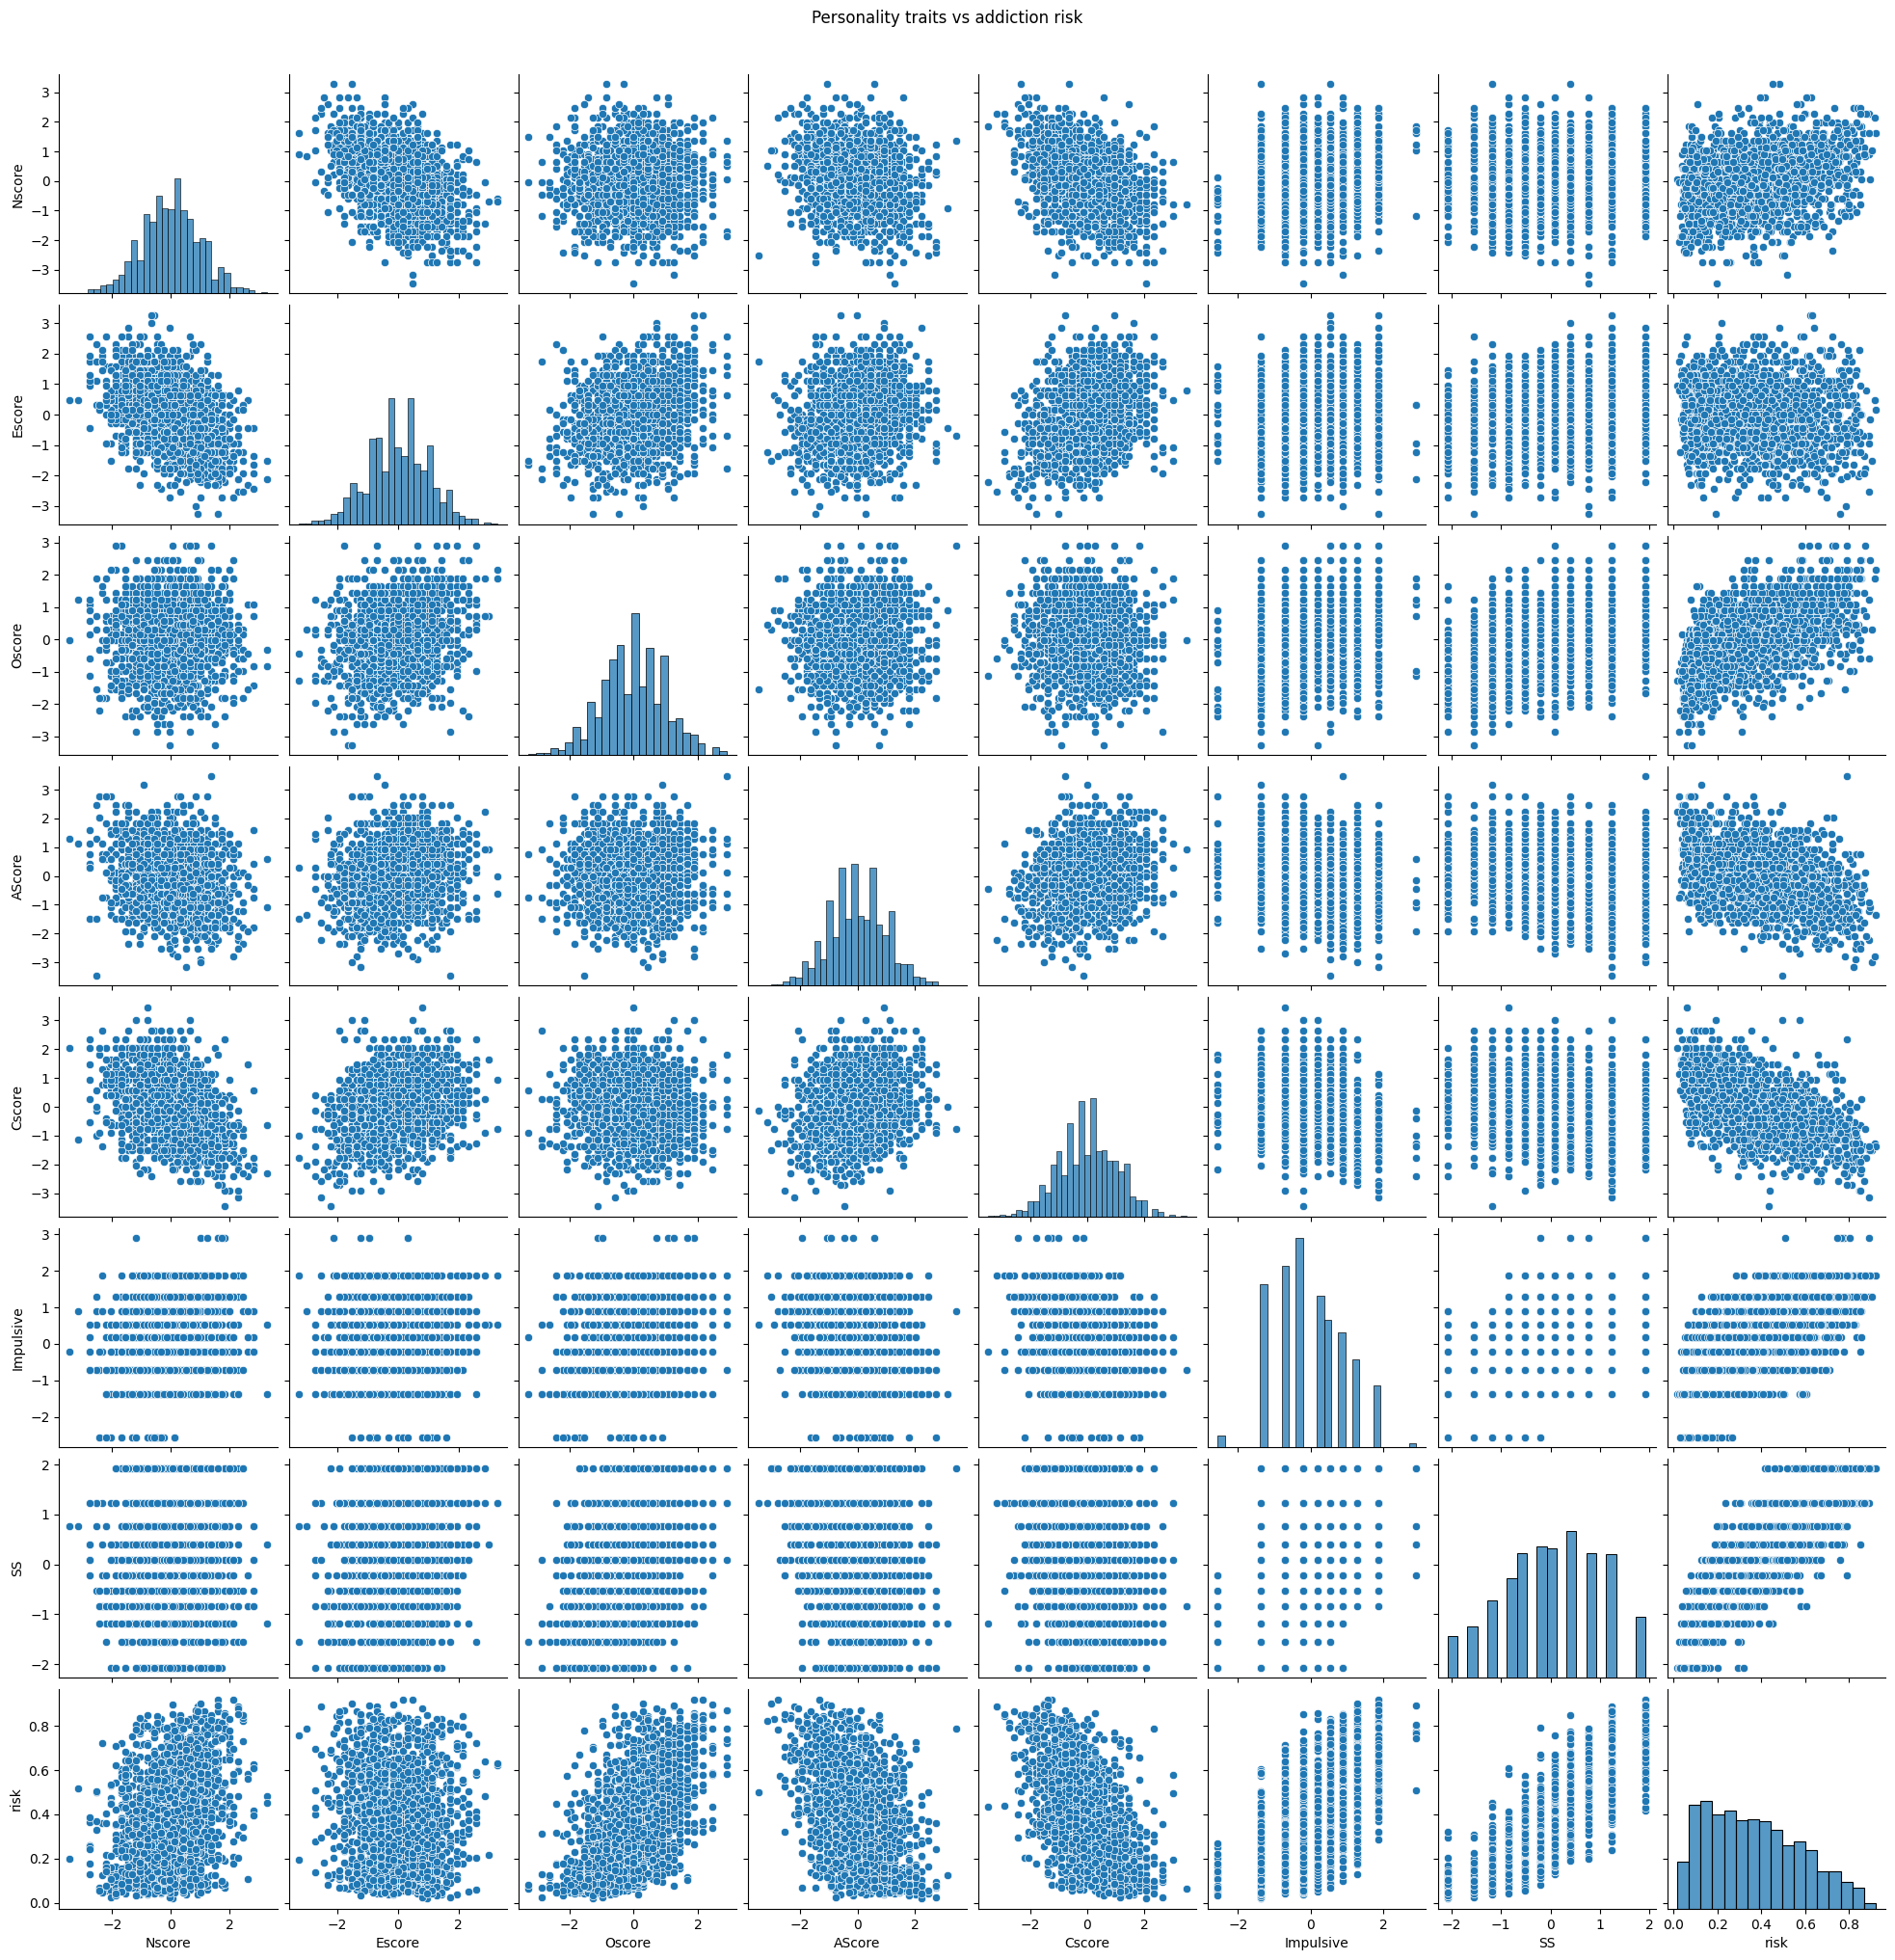

In [24]:
df_risk = df.copy()
df_risk["risk"] = probs_per_person
sns.pairplot(df_risk[['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'risk']])
plt.suptitle("Personality traits vs addiction risk", y=1.02)
plt.show()

If we assume the threshold to classify a person into addicion risk group is 50% of positive samples, the classification metrics are as follows.

In [25]:
mean_preds = probs_per_person > 0.5
from sklearn.metrics import classification_report
print(classification_report(df['HA_Drugs_Use'], mean_preds))

              precision    recall  f1-score   support

           0       0.73      0.84      0.79      1180
           1       0.65      0.49      0.56       704

    accuracy                           0.71      1884
   macro avg       0.69      0.67      0.67      1884
weighted avg       0.70      0.71      0.70      1884



We can also analyse the regresion coefficients distributions to better see the impact of each trait on the final score.

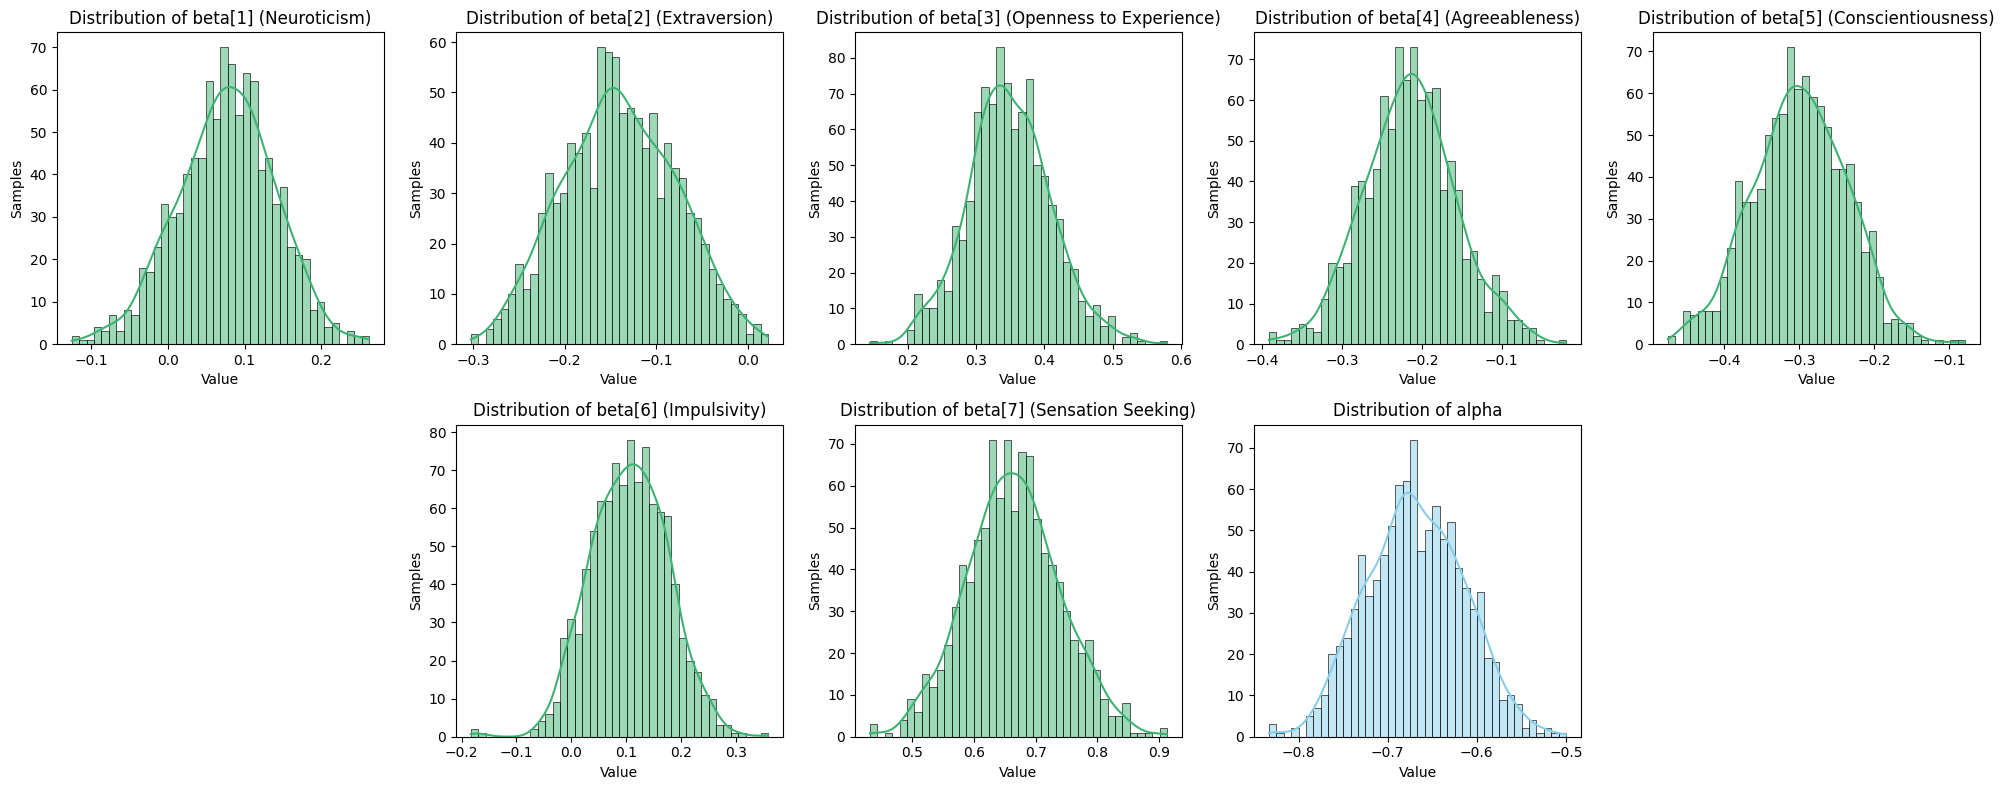

In [26]:
beta_cols = [col for col in samples.columns if col.startswith("beta[")]

psych_cols = [
    'Neuroticism',         # Nscore
    'Extraversion',        # Escore
    'Openness to Experience',  # Oscore
    'Agreeableness',       # AScore
    'Conscientiousness',   # Cscore
    'Impulsivity',         # Impulsive
    'Sensation Seeking'    # SS
]

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.flatten()

for i, col in enumerate(beta_cols):
    name_idx = i
    pos = i
    if i > 4:
        pos = i + 1
    sns.histplot(samples[col], bins=40, kde=True, ax=axs[pos], color='mediumseagreen')
    axs[pos].set_title(f"Distribution of {col} ({psych_cols[i]})")
    axs[pos].set_xlabel("Value")
    axs[pos].set_ylabel("Samples")

sns.histplot(samples['alpha'], bins=40, kde=True, ax=axs[8], color='skyblue')
axs[8].set_title(f"Distribution of alpha")
axs[8].set_xlabel("Value")
axs[8].set_ylabel("Samples")

for j in [5, 9]:
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

The distribution of parameter estimates clearly highlights the influence of individual personality traits on addiction risk. Openness to experience and sensation seeking emerge as the strongest predictors of increased likelihood of drug use. Conversely, conscientiousness appears to act as a protective factor, significantly reducing the risk. Interestingly, and somewhat unexpectedly, extraversion also correlates with a lower probability of substance use.

When we analyse two groups of people: 100 classified as most at risk and 100 least at risk, the mean and SD values of traits are as follows.

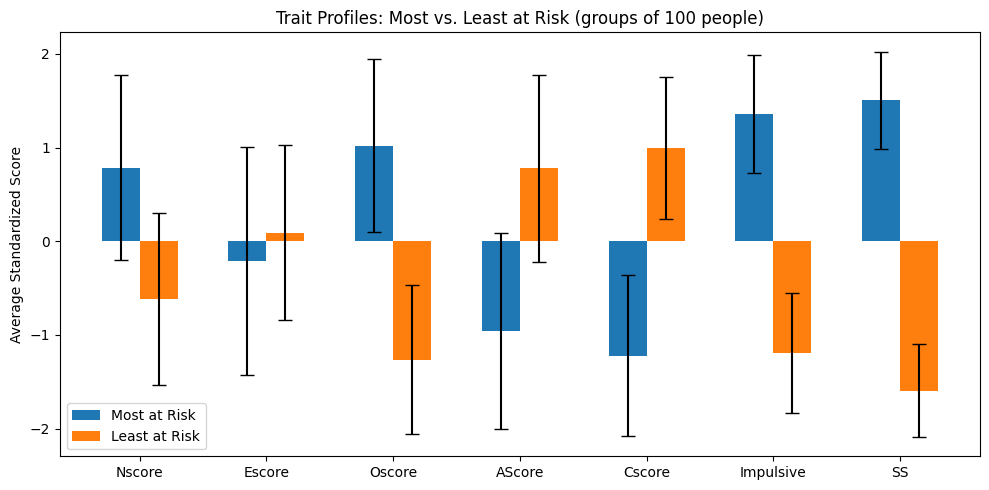

In [27]:
psych_cols = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']
most_at_risk = np.argsort(probs_per_person)[-100:]
least_at_risk = np.argsort(probs_per_person)[:100]
X_mean_most_risk = df.iloc[most_at_risk][psych_cols].mean(axis=0)
X_mean_least_risk = df.iloc[least_at_risk][psych_cols].mean(axis=0)
x = np.arange(len(psych_cols))

X_std_most_risk = df.iloc[most_at_risk][psych_cols].std(axis=0)
X_std_least_risk = df.iloc[least_at_risk][psych_cols].std(axis=0)

plt.figure(figsize=(10, 5))
plt.bar(x - 0.15, X_mean_most_risk, yerr=X_std_most_risk, width=0.3, capsize=5, label='Most at Risk')
plt.bar(x + 0.15, X_mean_least_risk, yerr=X_std_least_risk, width=0.3, capsize=5, label='Least at Risk')
plt.xticks(x, psych_cols)
plt.ylabel('Average Standardized Score')
plt.title('Trait Profiles: Most vs. Least at Risk (groups of 100 people)')
plt.legend()
plt.tight_layout()
plt.show()

## Model 2

The second model proposes an enhanced version of its predecessor, since it introduces three additional predictors: Age, Gender and Education. A separate coefficient beta[i] is assigned for each of those predictos in order to capture their influence on the probability of drug use.

The mean of the intercept (alpha) was modified to -1 to increase the base value of addiction risk. The coefficients beta[1-7] are sampled exactly the same as they are in the first model. Similarly to them, the coefficients beta[8-10] are sampled from normal distributions to reflect prior knowledge and uncertainty about these effects. The report "Patterns and Characteristics of Methamphetamine Use Among Adults — United States" [3] suggests that the risk of drug of consumption slightly decreases with age therefore, the mean of beta[1] coefficient is negative (-0.2). The gender coefficient beta[2] has a prior mean of -0.4, indicating a generally lower risk among women (Gender = 1) compared to men (Gender = 0). The distribution assigned to the education coefficient beta[3], that being the mean of -0.2 and standard deviation of 0.05 reflects the strong evidence that higher education is associated with a lower likelihood of drug use.

#### Data
N:
The number of observations (e.g., 1000 individuals).

X:
An N x 10 matrix of real-valued predictors. Each row corresponds to a person. Columns from 1 to 7 correspond to the seven standardized personality traits listed before. Columns 8 and 10 correspond to the integer values assigned to age groups and education levels of the respondents Column 9 corresponds to the gender of individuals (0-M, 1-F). Data from the columns containing demographic information was normalized via *StandardScaler* function.

y: 
Binary observed outcomes (drug user: 1, non-user: 0)

#### Formulas
The formulas details are summarized in the *Model 1* description.

### Prior predicitive check

In [28]:
from sklearn.preprocessing import StandardScaler

R=1000
N=1000

X_psych = np.random.normal(loc=0.0, scale=1.0, size=(N, 7))

age = np.random.randint(1, 7, N).reshape(-1, 1)
sex = np.random.randint(0, 2, N).reshape(-1, 1)
edu = np.random.randint(1, 7, N).reshape(-1, 1)
X_demo = np.hstack([age, sex, edu - 1]) 

scaler = StandardScaler()
X_demo_scaled = scaler.fit_transform(X_demo)

X_combined = np.hstack([X_psych, X_demo_scaled])

In [29]:
stanfile = 'stan_models/model_2_ppc_all.stan'
model = CmdStanModel(stan_file=stanfile, compile=True)
print(model.code())

13:11:55 - cmdstanpy - WARNING - CmdStanModel(compile=...) is deprecated and will be removed in the next major version. The constructor will always ensure a model has a compiled executable.
If you wish to force recompilation, use force_compile=True instead.
13:11:55 - cmdstanpy - INFO - compiling stan file /workspace/Data-Analytics---Drug-Consumption/stan_models/model_2_ppc_all.stan to exe file /workspace/Data-Analytics---Drug-Consumption/stan_models/model_2_ppc_all
13:12:17 - cmdstanpy - INFO - compiled model executable: /workspace/Data-Analytics---Drug-Consumption/stan_models/model_2_ppc_all


data {
  int<lower=0> N;             // number of observations
  matrix[N, 10] X;            // predictors
}

generated quantities {
  real alpha;                 // intercept
  vector[10] beta;            // regression coeffs
  vector[N] p;                // addiction probability
  vector[N] y_sim;            // label

  alpha = normal_rng(-1, 0.5);

  for (i in 1:5) {
    beta[i] = normal_rng(0, 0.3);          // neutral
  }
  for (i in 6:7) {
    beta[i] = normal_rng(0.5, 0.3);       
  }

  beta[8] = normal_rng(-0.2, 0.3);         // age
  beta[9] = normal_rng(-0.4, 0.3);         // gender
  beta[10] = normal_rng(-0.2, 0.05);       // education

  for (n in 1:N) {
    p[n] = inv_logit(alpha + dot_product(X[n], beta));  // addiction probability
    y_sim[n] = bernoulli_rng(p[n]);                     // label
  }
}


In [30]:
data = {'N': N, 'X': X_combined}
sim = model.sample(data=data, iter_sampling=R, chains=1, fixed_param=True, refresh=R)

p = sim.stan_variable('p')        # shape: (R, N)
y_sim = sim.stan_variable('y_sim')  # R x N

13:12:17 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

13:12:18 - cmdstanpy - INFO - CmdStan done processing.


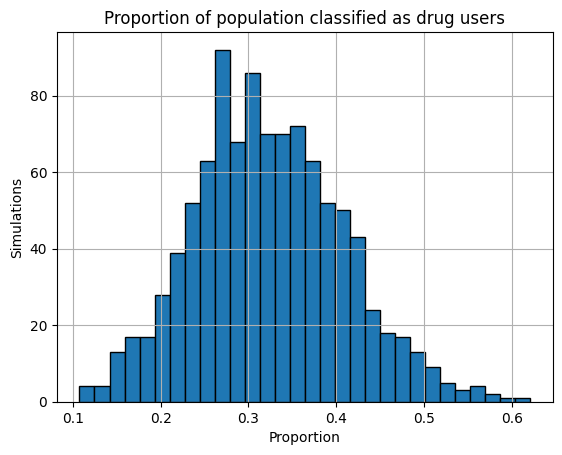

In [31]:
prob_per_sim = p.mean(axis=1) 
plt.hist(prob_per_sim, bins=30, edgecolor='k')
plt.xlabel("Proportion")
plt.ylabel("Simulations")
plt.title("Proportion of population classified as drug users")
plt.grid(True)
plt.show()

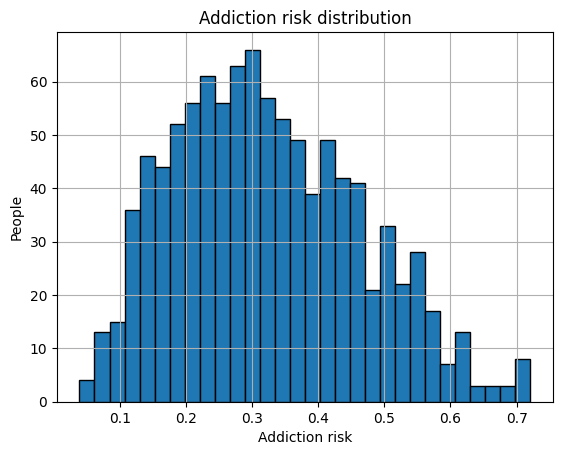

In [32]:
prob_per_person = p.mean(axis=0) 
plt.hist(prob_per_person, bins=30, edgecolor='k')
plt.xlabel("Addiction risk")
plt.ylabel("People")
plt.title("Addiction risk distribution")   # per person
plt.grid(True)
plt.show()

### Model fit and posterior predictive check

In [33]:
stanfile = 'stan_models/model_2_fit_all.stan'
model_fit = CmdStanModel(stan_file=stanfile, compile=True)
print(model.code())

13:12:19 - cmdstanpy - WARNING - CmdStanModel(compile=...) is deprecated and will be removed in the next major version. The constructor will always ensure a model has a compiled executable.
If you wish to force recompilation, use force_compile=True instead.
13:12:19 - cmdstanpy - INFO - compiling stan file /workspace/Data-Analytics---Drug-Consumption/stan_models/model_2_fit_all.stan to exe file /workspace/Data-Analytics---Drug-Consumption/stan_models/model_2_fit_all
13:13:02 - cmdstanpy - INFO - compiled model executable: /workspace/Data-Analytics---Drug-Consumption/stan_models/model_2_fit_all


data {
  int<lower=0> N;             // number of observations
  matrix[N, 10] X;            // predictors
}

generated quantities {
  real alpha;                 // intercept
  vector[10] beta;            // regression coeffs
  vector[N] p;                // addiction probability
  vector[N] y_sim;            // label

  alpha = normal_rng(-1, 0.5);

  for (i in 1:5) {
    beta[i] = normal_rng(0, 0.3);          // neutral
  }
  for (i in 6:7) {
    beta[i] = normal_rng(0.5, 0.3);       
  }

  beta[8] = normal_rng(-0.2, 0.3);         // age
  beta[9] = normal_rng(-0.4, 0.3);         // gender
  beta[10] = normal_rng(-0.2, 0.05);       // education

  for (n in 1:N) {
    p[n] = inv_logit(alpha + dot_product(X[n], beta));  // addiction probability
    y_sim[n] = bernoulli_rng(p[n]);                     // label
  }
}


In [34]:
psych_cols = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']
demo_cols = ['Age', 'Gender', 'Education']

scaler = StandardScaler()
X_demo_scaled = scaler.fit_transform(df[demo_cols])

X_combined = np.hstack([df[psych_cols].values, X_demo_scaled])

data = {
    'N': 1884,
    'X': X_combined.tolist(),
    'y': df['HA_Drugs_Use'].tolist()
}

fit=model_fit.sample(data=data, iter_sampling=1000, chains=1)
samples = fit.draws_pd()
alpha_samples = samples["alpha"]

13:13:03 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

13:13:08 - cmdstanpy - INFO - CmdStan done processing.


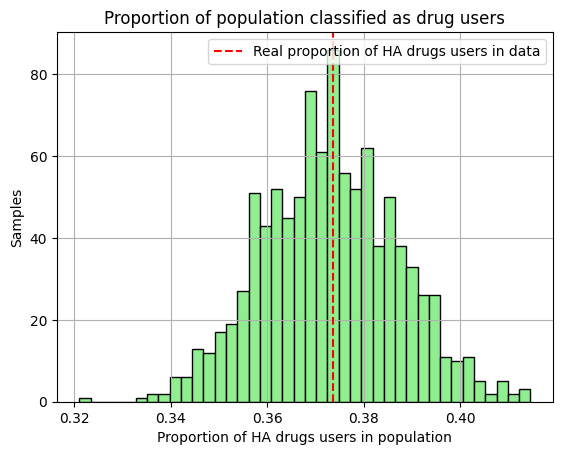

In [35]:
y_pred_cols = [col for col in samples.columns if col.startswith('y_pred')]
y_pred_matrix = samples[y_pred_cols].values
predicted_proportions = y_pred_matrix.mean(axis=1)

plt.hist(predicted_proportions, bins=40, color='lightgreen', edgecolor='black')
plt.axvline(df["HA_Drugs_Use"].mean(), color='red', linestyle='--', label='Real proportion of HA drugs users in data')
plt.xlabel('Proportion of HA drugs users in population')
plt.ylabel('Samples')
plt.title('Proportion of population classified as drug users')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_154/4762292.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


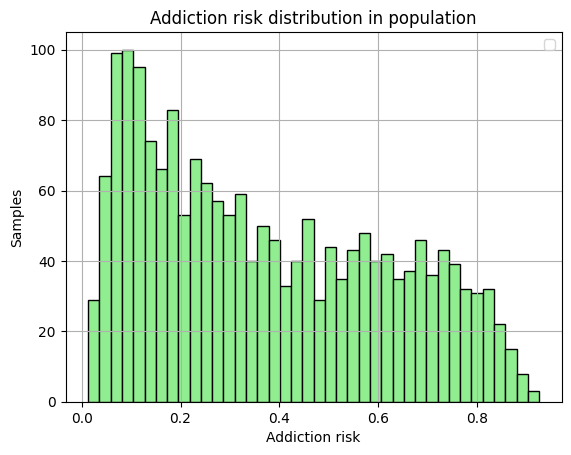

In [36]:
y_pred_cols = [col for col in samples.columns if col.startswith('y_pred')]
y_pred_matrix = samples[y_pred_cols].values
probs_per_person = y_pred_matrix.mean(axis=0)

plt.hist(probs_per_person, bins=40, color='lightgreen', edgecolor='black')
plt.xlabel("Addiction risk")
plt.ylabel("Samples")
plt.title("Addiction risk distribution in population")
plt.legend()
plt.grid(True)
plt.show()

## Bibliography

[1] Fehrman, E., Muhammad, A. K., Mirkes, E. M., Egan, V., & Gorban, A. N. (2017). The five factor model of personality and evaluation of drug consumption risk. In Data science: innovative developments in data analysis and clustering (pp. 231-242). Springer International Publishing.

[2] McDaniel SR, Mahan JE. An examination of the Impss scale as a valid and reliable alternative to the SSS-V in optimum stimulation level research. Personality and Individual Differences. 2008; 44(7):1528–1538.

[3] Jones CM, Compton WM, Mustaquim D. Patterns and Characteristics of Methamphetamine Use Among Adults — United States, 2015–2018. MMWR Morb Mortal Wkly Rep 2020;69:317–323. DOI: http://dx.doi.org/10.15585/mmwr.mm6912a1